In [91]:
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.pyplot import figure

def plot(cancerList, weight=2, cutoff=30, savePlot=False):
    for myCancer in cancerList:
        G = nx.Graph()
        print(myCancer)
        ####### Mutually Exclusive Red Edges ###########
        ME_count = 0
        file_n = myCancer + '/' + myCancer + "_mut.csv"
        with open(file_n, newline='') as f:
            reader = csv.reader(f)
            next(reader)
            for row in reader:
                G.add_edge(row[1], row[2], color='r', weight=weight)
                ME_count += 1
                if ME_count >= cutoff: break

        print("# of ME: "+str(len(G.edges)))

        ####### Co-occurance Blue Edges #########
        Co_count = 0
        ### Data loading ###
        file_n = myCancer + '/' + "bigSummaryDf_" + myCancer + ".csv"
        if myCancer == 'BLCA':
            file_n = "BLCA/bigSummaryDfw_cutoff_BLCA.csv"
        if myCancer=='PAAD'or myCancer=='LUSC'or myCancer =='LUAD':
            file_n = myCancer + '/' + "bigSummaryDf_2ndtry" + myCancer + ".csv"
        data = pd.read_csv(file_n)
        data.sort_values("pval", inplace=True)
        
        ### Apply threshold and add edges
        for idx, row in data.iterrows():
            if row["co_occurance"] >= row["co_cut"] and row['pval']<0.05:
                print(row['pval'])
                Co_count += 1
                n1 = row['gene1']
                n2 = row['gene2']
                if G.has_edge(n1, n2):
                    ### If Co-occurance and Exclusive duplicate
                    G.add_edge(n1, n2, color='g', weight=weight)
                    print('AAAAAAAAAAAAAAAAAA')
                else:
                    G.add_edge(n1, n2, color='b', weight=weight)
            if Co_count >= cutoff: break
        print("# of Co: "+str(len(G.edges)-ME_count))

        ####### Checking if there is no significant gene-pair
        edges = G.edges()
        if len(edges) == 0:
            continue

        pos = nx.circular_layout(G)
        pos = nx.kamada_kawai_layout(G)

        ####### Plotting
        colors = [G[u][v]['color'] for u,v in edges]
        weights = [G[u][v]['weight'] for u,v in edges]

        plt.figure(figsize=(12,12))
        nx.draw(G, pos, node_color='yellow', with_labels=True, \
                font_size=12, node_size=200, font_weight='bold', alpha=0.6, \
                edges=edges, edge_color=colors, width=weights)
        plt.title(myCancer)
        red = mpatches.Patch(color='red', label='Mutually Exclusive')
        blue = mpatches.Patch(color='blue', label='Co-occurance')
        green = mpatches.Patch(color='green', label='Ambiguous')
        plt.legend(handles=[red, blue, green])
        if savePlot:
            plt.savefig(myCancer+'/'+myCancer+'_net.png', bbox_inches="tight")
        plt.show()

BLCA
# of ME: 5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
0.002
0.002
0.002
0.002
0.002
# of Co: 30


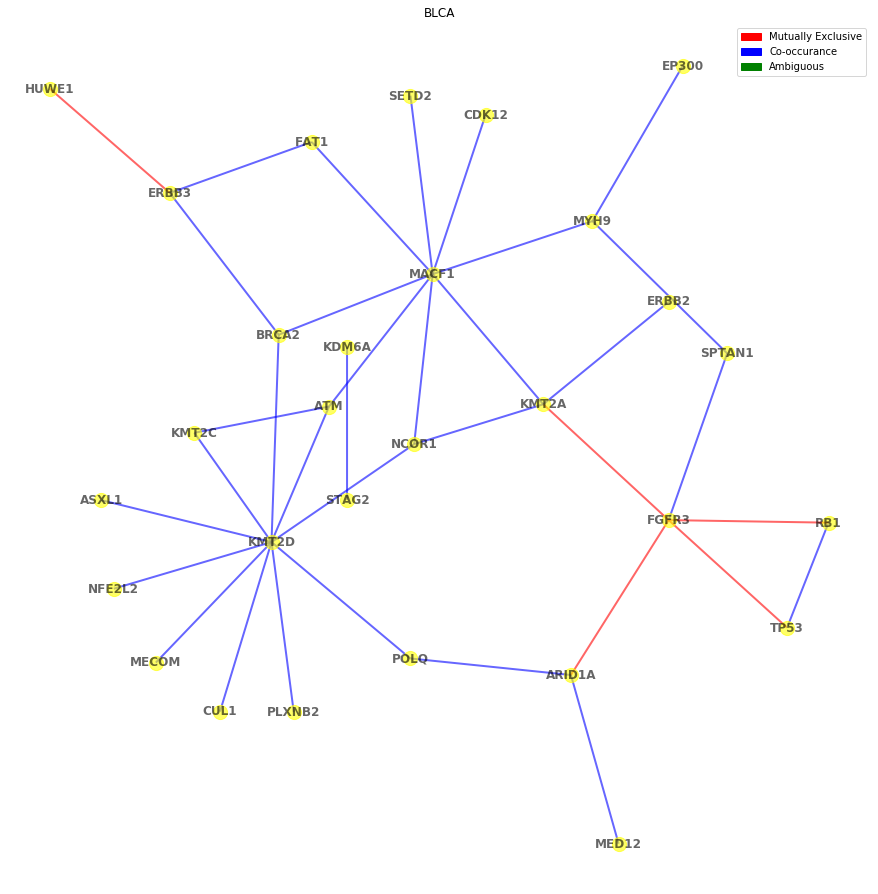

BRCA
# of ME: 25
0.002
0.004
0.004
0.012
0.013999999999999999
0.016
0.018000000000000002
0.02
0.026000000000000002
0.036000000000000004
0.038
0.04
0.044000000000000004
0.046
0.048
# of Co: 15


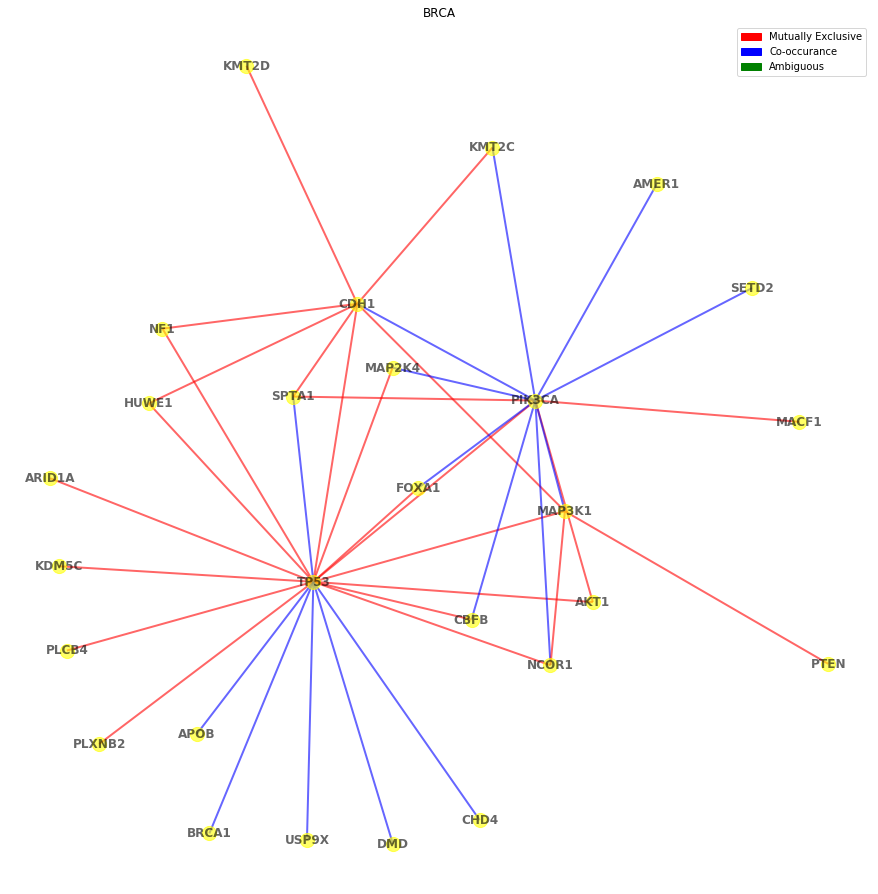

GBM
# of ME: 13
0.0
0.0
0.002
0.006
0.013999999999999999
# of Co: 5


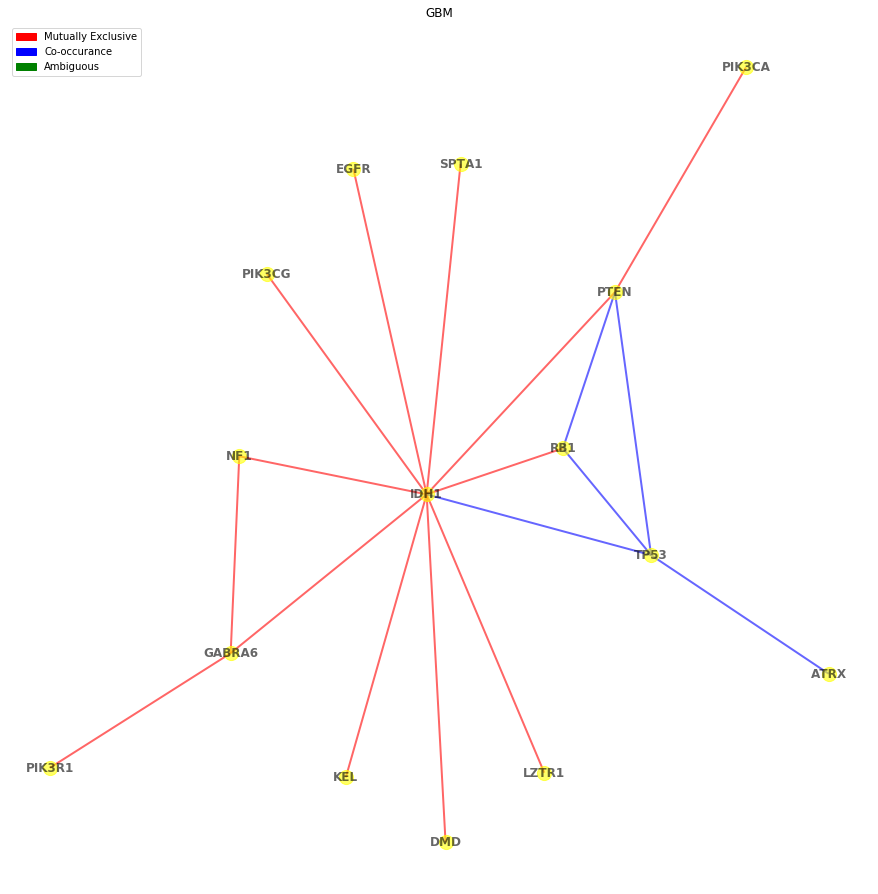

LGG
# of ME: 21
0.0
0.0
0.0
0.0
0.048
# of Co: 5


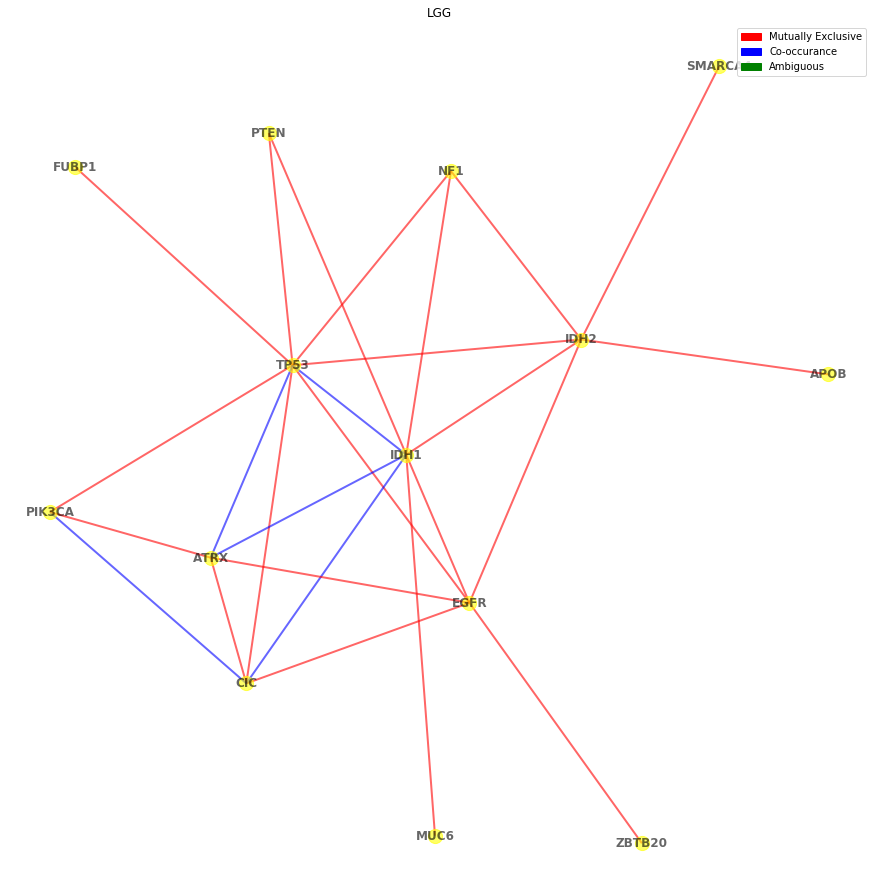

LIHC
# of ME: 0
# of Co: 0
KIRC
# of ME: 0
# of Co: 0
CESC
# of ME: 0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006
0.006
0.008
0.008
0.008
0.02
0.032
0.032
0.034
0.042
# of Co: 19


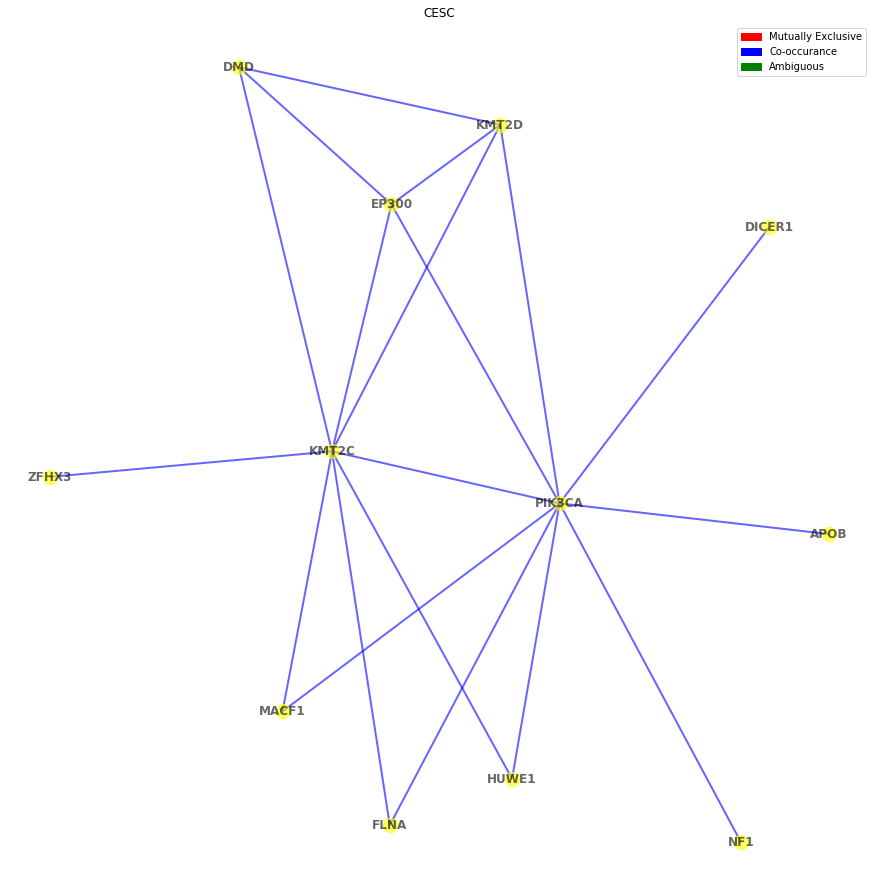

SKCM
# of ME: 10
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
# of Co: 30


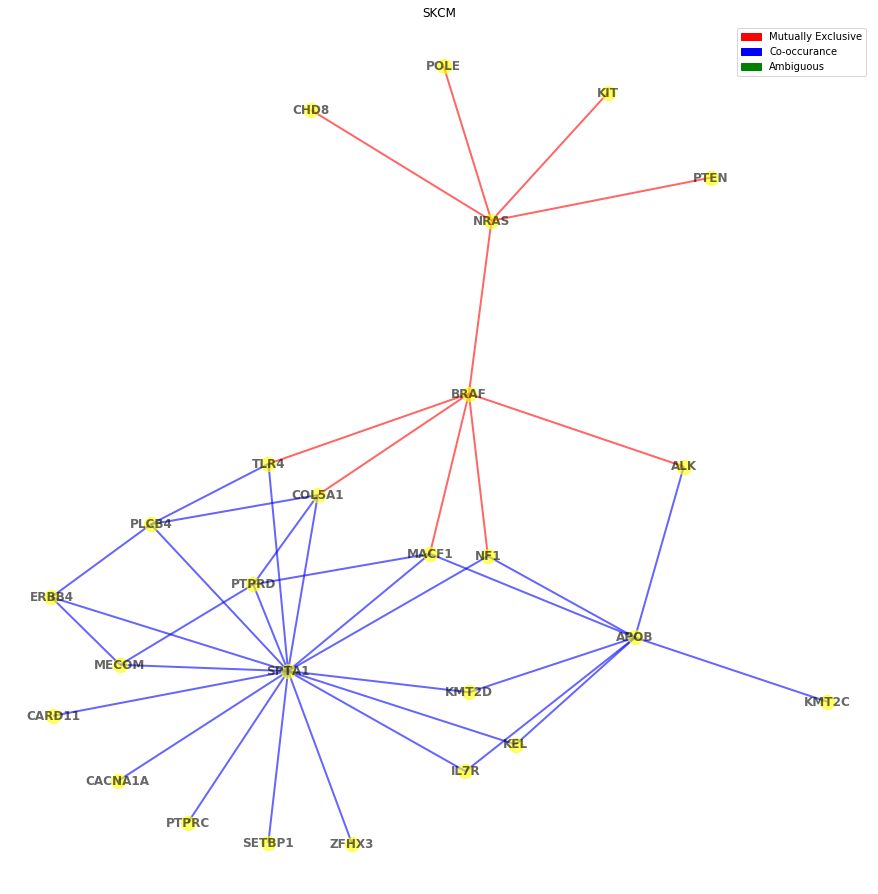

PAAD
# of ME: 0
0.0
0.0
0.0
0.0
0.0
0.0
0.002
0.002
0.002
0.002
0.002
0.002
0.004
0.006
0.016
0.018000000000000002
0.018000000000000002
0.024
0.026000000000000002
0.026000000000000002
0.026000000000000002
0.027999999999999997
0.027999999999999997
0.034
0.036000000000000004
0.038
0.042
0.044000000000000004
# of Co: 28


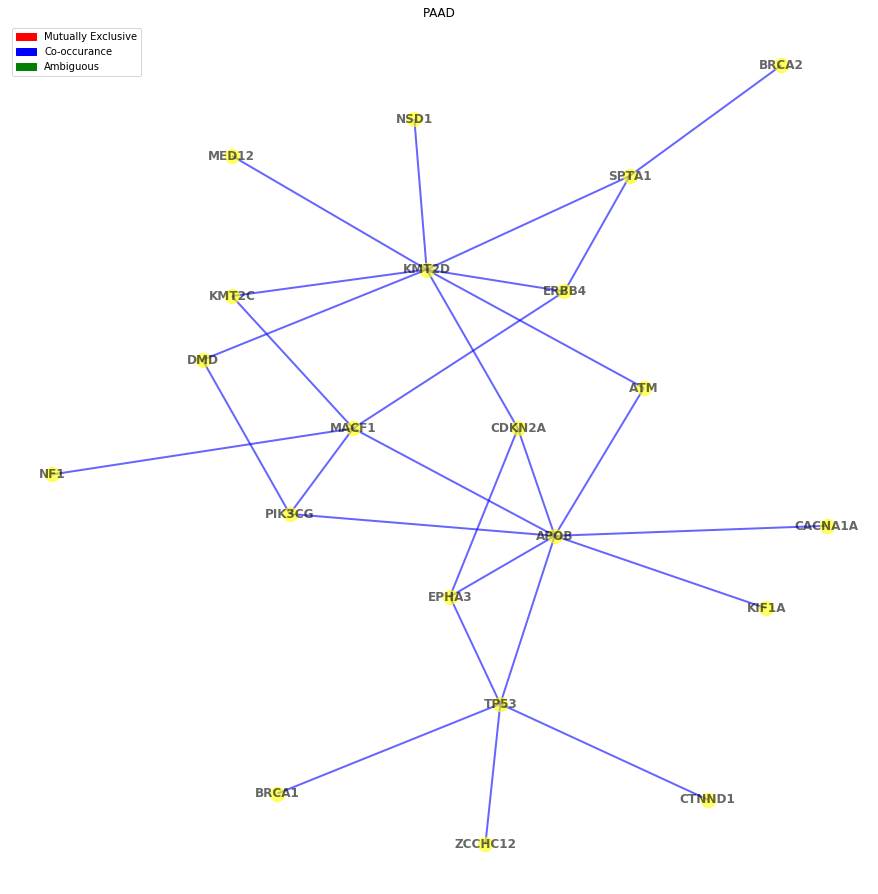

LUSC
# of ME: 0
0.0
0.0
0.0
0.0
0.0
0.002
0.002
0.002
0.004
0.006
0.008
0.008
0.008
0.012
0.012
0.013999999999999999
0.016
0.016
0.022000000000000002
0.022000000000000002
0.022000000000000002
0.024
0.026000000000000002
0.027999999999999997
0.032
0.034
0.036000000000000004
0.04
0.042
0.046
# of Co: 30


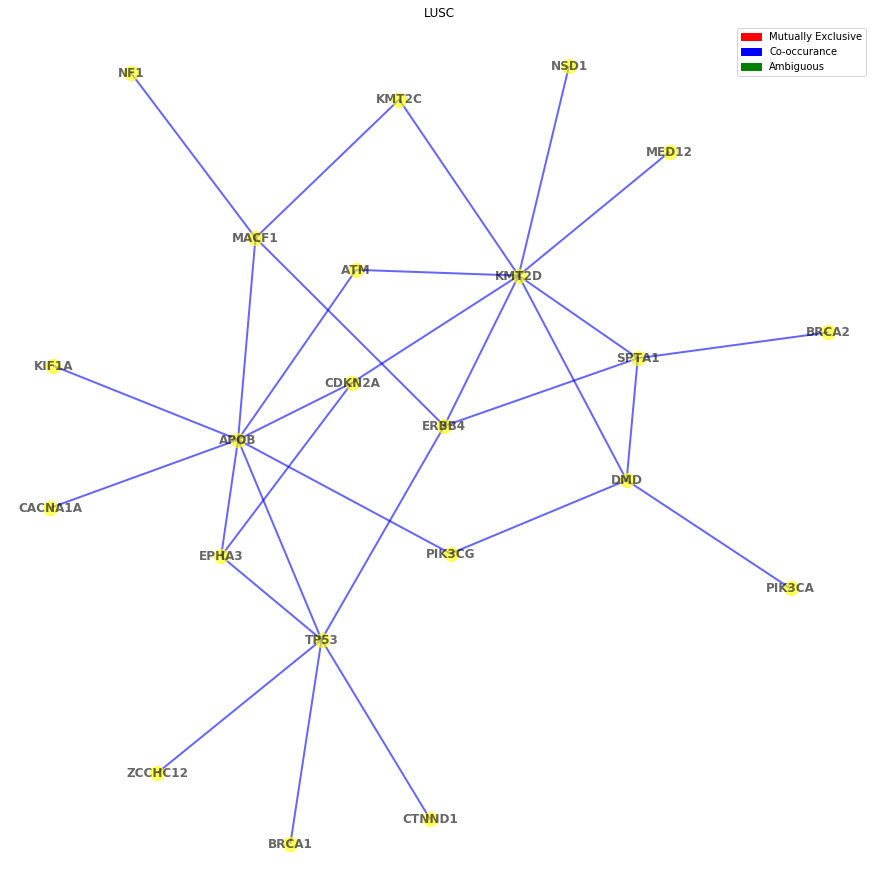

LUAD
# of ME: 7
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
# of Co: 30


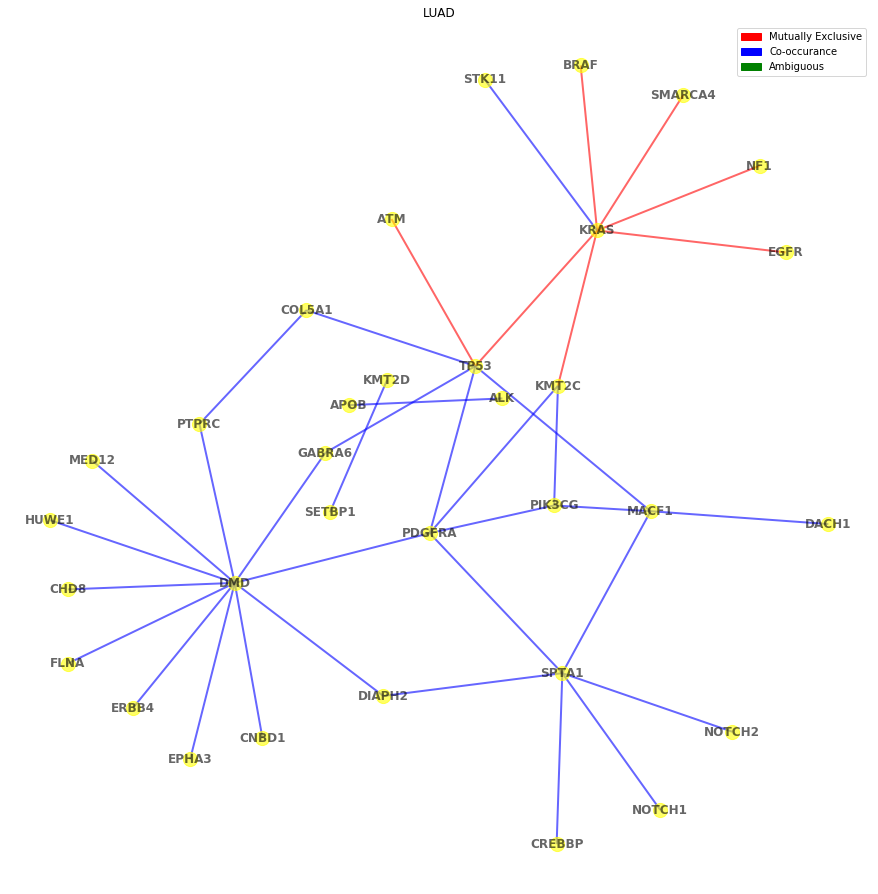

UCEC
# of ME: 30
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
# of Co: 30


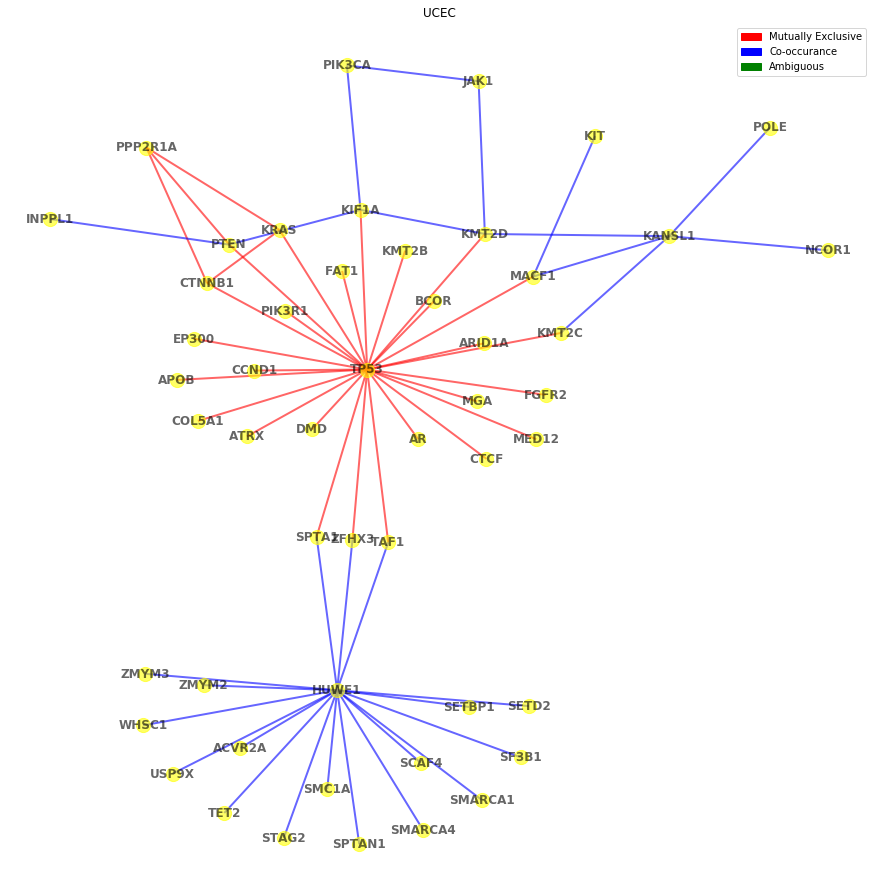

STAD
# of ME: 22
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
# of Co: 30


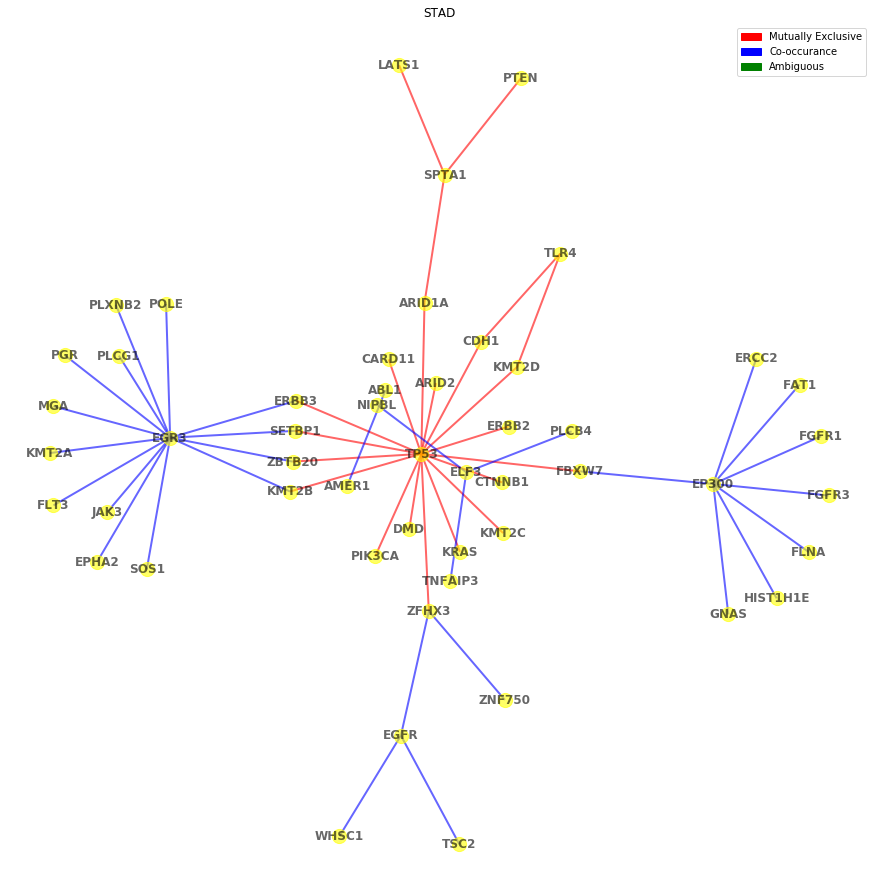

In [92]:
# cancerList = ["BRCA", "GBM", "LAML", "LGG", "LIHC", "KIRP", "KIRC", \
#               "CESC", "STAD", "SKCM", "SARC", "PAAD", "LUSC", "LUAD", \
#               "UCEC"]

cancerList = ["BLCA","BRCA", "GBM", "LGG", "LIHC", "KIRC", \
              "CESC", "SKCM", "PAAD", "LUSC", "LUAD", \
              "UCEC", "STAD"]
plot(cancerList, 2, savePlot=True)